## Create synthetic datasets for testing

In [2]:
import numpy as np
import pandas as pd

#### A. Create LGD dataset

In [4]:
# Create LGD dataset with facility level predicted and realised LGDs
NUM_FACILITIES = 1_000

df = pd.DataFrame(np.arange(NUM_FACILITIES)+1, columns=["facility"])
df['predicted_lgd'] = np.random.randint(0, 100, NUM_FACILITIES) / 100
df['realised_lgd'] = np.clip((df['predicted_lgd'] + np.random.randint(-10, 10, size=len(df)) / 100), 0, 1)
df['segment'] = pd.cut(df['predicted_lgd'], 10, labels=False)
df['ead'] = np.random.randint(100, 1000, NUM_FACILITIES) * df['segment'] + 500

df.head()

,facility,predicted_lgd,realised_lgd,segment,ead
0,1,0.80,0.83,8,5860
1,2,0.75,0.81,7,6653
2,3,0.42,0.45,4,3192
3,4,0.99,1.00,9,7322
4,5,0.90,0.86,9,5513


In [38]:
df.describe()

,facility,predicted_lgd,realised_lgd,segment
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,0.49394,0.49335,4.497000
std,288.819436,0.28898,0.28989,2.882065
min,1.000000,0.00000,0.00000,0.000000
25%,250.750000,0.25000,0.25000,2.000000
50%,500.500000,0.50000,0.50000,5.000000
75%,750.250000,0.75000,0.74000,7.000000
max,1000.000000,0.99000,1.00000,9.000000


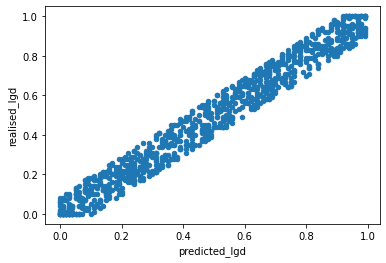

In [33]:
df.plot.scatter(x="predicted_lgd", y="realised_lgd");

In [5]:
df.to_csv('lgd_t_test.csv', index=False)

### B. Create migration matrix data

In [45]:
matrix = pd.DataFrame({'period_1_ratings': np.random.choice([1, 2, 3, 4, 5, 6, 7, 8], 300)})
matrix['period_2_ratings'] = np.clip(matrix['period_1_ratings'] + np.random.randint(-3, 3, size=len(matrix)), 1, 8)

                       
                       
matrix.to_csv('pd_transition_matrix.csv', index=False)

### C. Create PD calibration dataset

In [55]:
# Create LGD dataset with facility level predicted and realised LGDs
NUM_RATINGS = 10

df = pd.DataFrame(np.arange(NUM_RATINGS)+1, columns=["rating"])
df['predicted_pd'] = df["rating"] / 100 
df['realised_pd'] = np.clip(df['predicted_pd'] + np.random.randint(-10, 10, size=len(df)) / 1000, 0, 1)
df['count'] = df['rating'] * 1000
df.head()

,rating,predicted_pd,realised_pd,count
0,1,0.01,0.013,1000
1,2,0.02,0.011,2000
2,3,0.03,0.037,3000
3,4,0.04,0.048,4000
4,5,0.05,0.046,5000


In [56]:
df.to_csv('pd_calibration.csv', index=False)